# Exercise-3: Support Vector Machines (SVM) 
## Q3.1  Train a linear SVM (kernel="linear") and evaluate on validation sets (use the original 5 splits that was created in previous exercise). Report accuracy mean, std and plot the ROC for each split. 



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc

# Load dataset
df = pd.read_csv("../archive/data.csv")
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M':1, 'B':0})

# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [11]:

# 5-fold Stratified CV
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_idx, val_idx in kf.split(X_std, y):
    X_tr, X_val_split = X_std[train_idx], X_std[val_idx]
    y_tr, y_val_split = y.values[train_idx], y.values[val_idx]
    
    clf = SVC(kernel="linear", probability=True, random_state=42)
    clf.fit(X_tr, y_tr)
    
    y_pred = clf.predict(X_val_split)
    accuracies.append(accuracy_score(y_val_split, y_pred))

print(f"Validation Accuracy Mean: {np.mean(accuracies):.4f}") 
print(f"Validation Accuracy Std: {np.std(accuracies):.4f}")

Validation Accuracy Mean: 0.9754
Validation Accuracy Std: 0.0195


### Plotting the ROC for each split: 

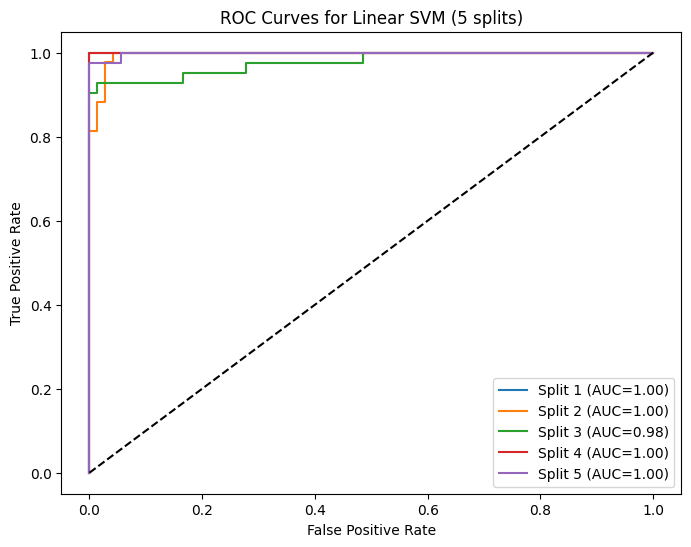

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for i, (train_idx, val_idx) in enumerate(kf.split(X_std, y), 1):
    X_tr, X_val_split = X_std[train_idx], X_std[val_idx]
    y_tr, y_val_split = y.values[train_idx], y.values[val_idx]
    
    clf = SVC(kernel="linear", probability=True, random_state=42)
    clf.fit(X_tr, y_tr)
    
    y_prob = clf.predict_proba(X_val_split)[:,1]
    fpr, tpr, _ = roc_curve(y_val_split, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Split {i} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Linear SVM (5 splits)')
plt.legend()
plt.show()


A ROC (Receiver Operating Characteristic) curve is a
Graph that plots the true positive rate aginst the False positive rate for binary classification model at various treshold settings 

For our SVM model we can see that it doesnt often get False positive hits, some splits such as the 5th split barely deviates from a straight line whilst for example split 3 has some deviation at the end

Next to the graph we see that Split 3 has a AUC ("Area Under the Curve") of = 0.98 which still show a pretty good True/False postitive rate ratio 

## Q3.2 Train an Radial Basis Function (RBF) kernel SVM. Compare its performance to the linear kernel using validation accuracy. Plot ROC for these models. 

compare validation accuracy of Linear vs RBF SVM

Notes for myself:
Radial Basis Function (RBF) measures how close a point is to a center point. It gives a high value when the point is near the center and a low value when its far away. Usually RBF is used in Gaussian functions which lookes like a smooth bell curve, which is often used in Machine Learning

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

linear_acc, rbf_acc = [], []

for train_idx, val_idx in kf.split(X_std, y):
    X_tr, X_val_split = X_std[train_idx], X_std[val_idx]
    y_tr, y_val_split = y.values[train_idx], y.values[val_idx]
    
    # Linear SVM
    clf_lin = SVC(kernel="linear", probability=True, random_state=42)
    clf_lin.fit(X_tr, y_tr)
    linear_acc.append(accuracy_score(y_val_split, clf_lin.predict(X_val_split)))
    
    # RBF SVM
    clf_rbf = SVC(kernel="rbf", probability=True, random_state=42)
    clf_rbf.fit(X_tr, y_tr)
    rbf_acc.append(accuracy_score(y_val_split, clf_rbf.predict(X_val_split)))

print(f"Linear SVM Accuracy: {np.mean(linear_acc):.4f} ± {np.std(linear_acc):.4f}")
print(f"RBF SVM Accuracy: {np.mean(rbf_acc):.4f} ± {np.std(rbf_acc):.4f}")


Linear SVM Accuracy: 0.9719 ± 0.0065
RBF SVM Accuracy: 0.9772 ± 0.0043


The accuracy does seem to improve with RBF but due to the already high accuracy its not a very high change, for some random_state values we actually dont see any improvement at all, like for random_state = 42 (shown bellow)

In [14]:
kf_42 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
linear_acc, rbf_acc = [], []

for train_idx, val_idx in kf_42.split(X_std, y):
    X_tr, X_val_split = X_std[train_idx], X_std[val_idx]
    y_tr, y_val_split = y.values[train_idx], y.values[val_idx]
    
    # Linear SVM
    clf_lin = SVC(kernel="linear", probability=True, random_state=42)
    clf_lin.fit(X_tr, y_tr)
    linear_acc.append(accuracy_score(y_val_split, clf_lin.predict(X_val_split)))
    
    # RBF SVM
    clf_rbf = SVC(kernel="rbf", probability=True, random_state=42)
    clf_rbf.fit(X_tr, y_tr)
    rbf_acc.append(accuracy_score(y_val_split, clf_rbf.predict(X_val_split)))
print(f"Linear SVM Accuracy: {np.mean(linear_acc):.4f} ± {np.std(linear_acc):.4f}")
print(f"RBF SVM Accuracy: {np.mean(rbf_acc):.4f} ± {np.std(rbf_acc):.4f}")

Linear SVM Accuracy: 0.9754 ± 0.0195
RBF SVM Accuracy: 0.9754 ± 0.0195


### Plotting ROC curves for the SVM comparison  

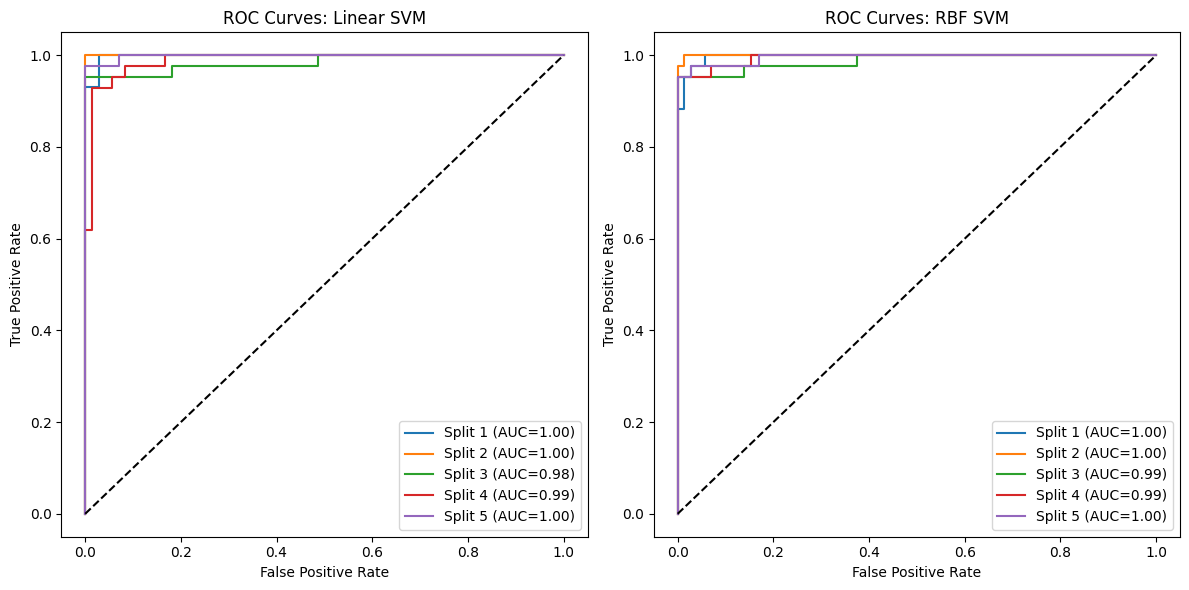

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, (train_idx, val_idx) in enumerate(kf.split(X_std, y), 1):
    X_tr, X_val_split = X_std[train_idx], X_std[val_idx]
    y_tr, y_val_split = y.values[train_idx], y.values[val_idx]
    
    # Linear SVM 
    clf_lin = SVC(kernel="linear", probability=True, random_state=42)
    clf_lin.fit(X_tr, y_tr)
    y_prob_lin = clf_lin.predict_proba(X_val_split)[:, 1]
    fpr_lin, tpr_lin, _ = roc_curve(y_val_split, y_prob_lin)
    roc_auc_lin = auc(fpr_lin, tpr_lin)
    axes[0].plot(fpr_lin, tpr_lin, label=f'Split {i} (AUC={roc_auc_lin:.2f})')
    
    # RBF SVM 
    clf_rbf = SVC(kernel="rbf", probability=True, random_state=42)
    clf_rbf.fit(X_tr, y_tr)
    y_prob_rbf = clf_rbf.predict_proba(X_val_split)[:, 1]
    fpr_rbf, tpr_rbf, _ = roc_curve(y_val_split, y_prob_rbf)
    roc_auc_rbf = auc(fpr_rbf, tpr_rbf)
    axes[1].plot(fpr_rbf, tpr_rbf, label=f'Split {i} (AUC={roc_auc_rbf:.2f})')

#
for ax, title in zip(axes, ['Linear SVM', 'RBF SVM']):
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curves: {title}')
    ax.legend()

plt.tight_layout()
plt.show()


The little almost-non existent False Positive rate in the Linear SVM ended up being even more almost-non existent in the SBF SVM  

### Q3.3 Experiment with different values of regularization strength (C). Use validation set to select the best C. Then report results as a plot  of accuracy vs C

In [18]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization (PCA)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_std)


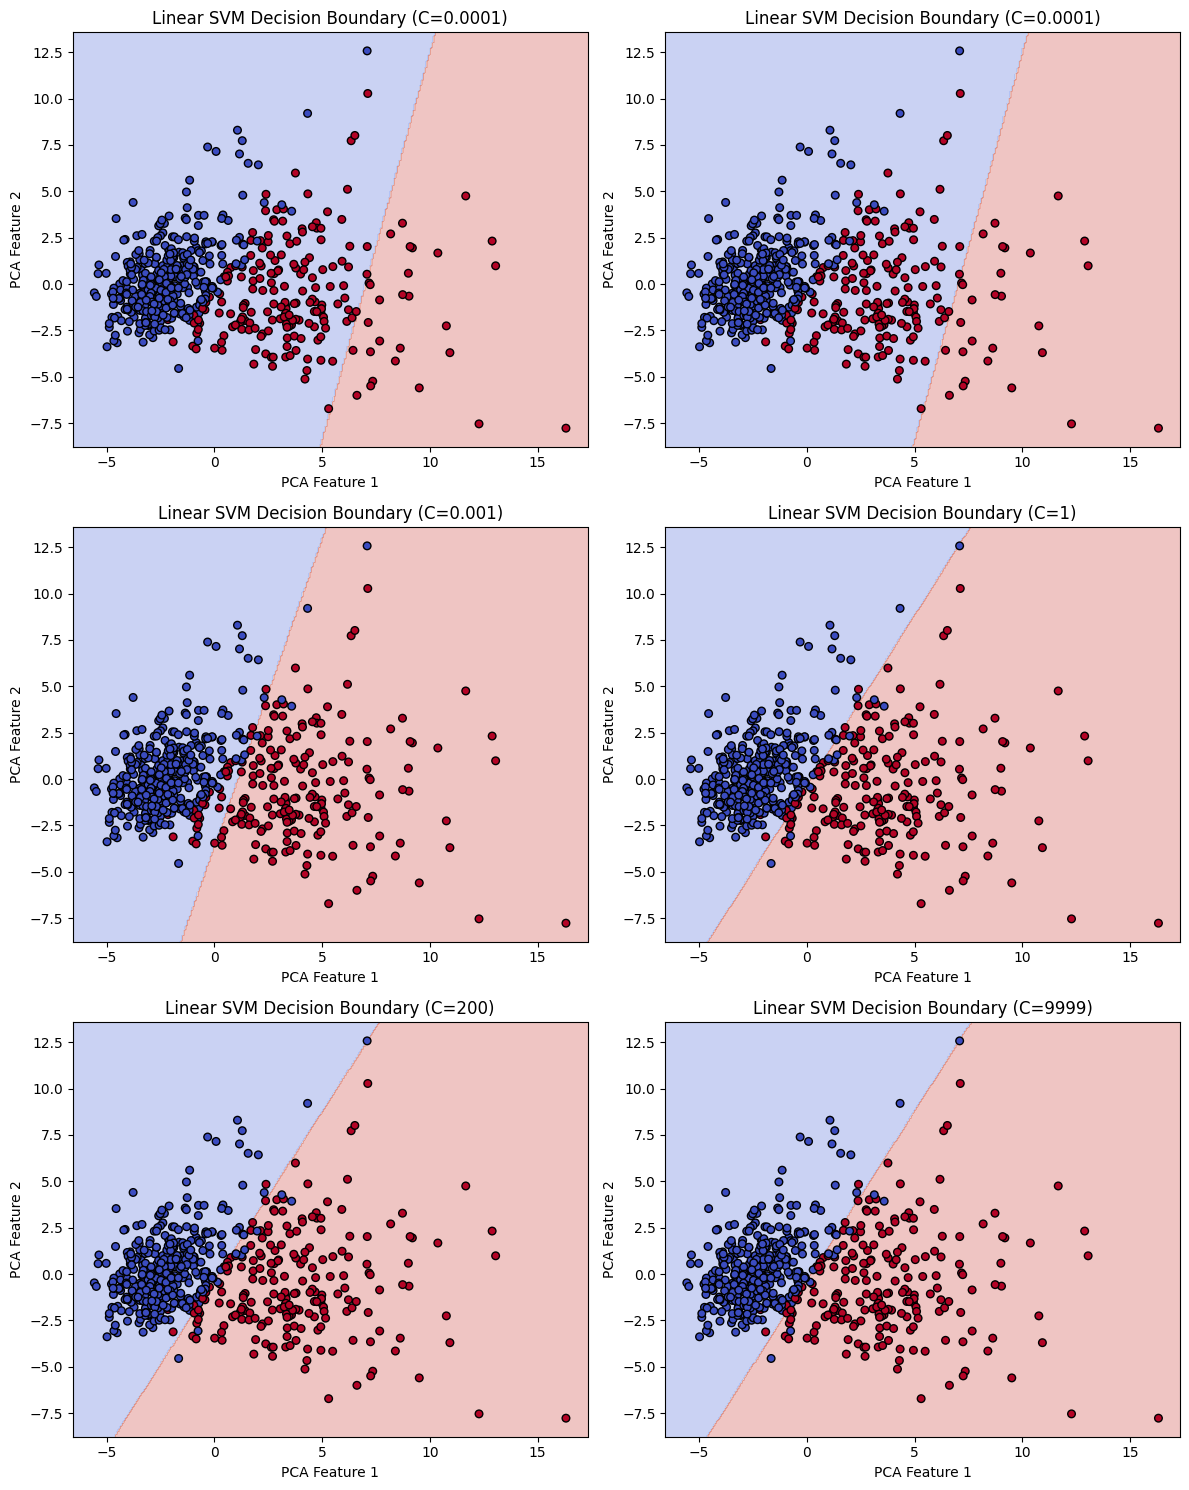

In [19]:
def plot_svm(C_value, ax):
    clf = SVC(kernel="linear", C=C_value)
    clf.fit(X_2d, y)

    # Create mesh for visualization
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=30)
    ax.set_title(f"Linear SVM Decision Boundary (C={C_value})")
    ax.set_xlabel("PCA Feature 1")
    ax.set_ylabel("PCA Feature 2")

# Create a figure with a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.ravel()  # Flatten the axes array for easier indexing

C_values = [0.0001, 0.0001, 0.001, 1, 200,  9999]
for i, C in enumerate(C_values):
    plot_svm(C, axes[i])



plt.tight_layout()
plt.show()

As we can see, the boundary closes in to where it defines the definitive spot to set the boundary line, and when it reaches that point it comes to a halt (we see no significant increase from C = 1 to C = 999999, but from before >0.1 we can see the boundary line slowly approching the the wished boundary point) 